<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/PCA_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

主成分分析などでのプロットを見せられて、「この２つのデータの分布は大きく違わない」という説明を受けて「ホントか？」と思う機会がときどきあったので、そうじゃないデータを作ってみました。

# データの作成１

x, y, z の３次元からなる２種類のデータ data1 と data2 を次のようにして作成します。

In [0]:
import numpy as np

x = np.random.normal(50,10, size=(500)) 
y = np.random.normal(50,10, size=(500)) 
z = np.random.normal(50, 1, size=(500))

x1 = x[np.where(z > 51, True, False)]
y1 = y[np.where(z > 51, True, False)]
z1 = z[np.where(z > 51, True, False)]

x2 = x[np.where(z < 49, True, False)]
y2 = y[np.where(z < 49, True, False)]
z2 = z[np.where(z < 49, True, False)]

data1 = np.concatenate([x1, y1, z1]).reshape(3, (len(x1))).transpose(1, 0)
data2 = np.concatenate([x2, y2, z2]).reshape(3, (len(x2))).transpose(1, 0)

data = np.concatenate([data1, data2])

colors = ["red" if i >len(data1) else "blue" for i in range(len(data1)+len(data2))]

# 主成分分析

主成分分析して、「ほうら、この２つのデータセットは、分布が大きく違わないでしょう？」（ドヤ顔）

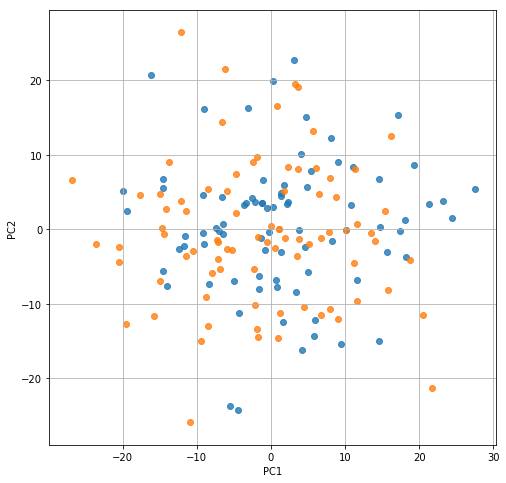

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #主成分分析器

#主成分分析の実行
pca = PCA()
pca.fit(data)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(data)
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
plt.scatter(feature[:len(data1), 0], feature[:len(data1), 1], alpha=0.8)
plt.scatter(feature[len(data1):, 0], feature[len(data1):, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# 累積寄与率

「なんなら、累積寄与率も見せちゃいますよ。第二主成分（PC2）までで累積寄与率ほぼ１００％でしょう？」（ドヤ顔）

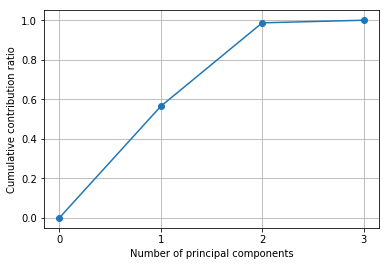

In [0]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
import numpy as np
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

# 散布図行列

「散布図行列も見せてもらえませんか？」

（ドッキーン！！）

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


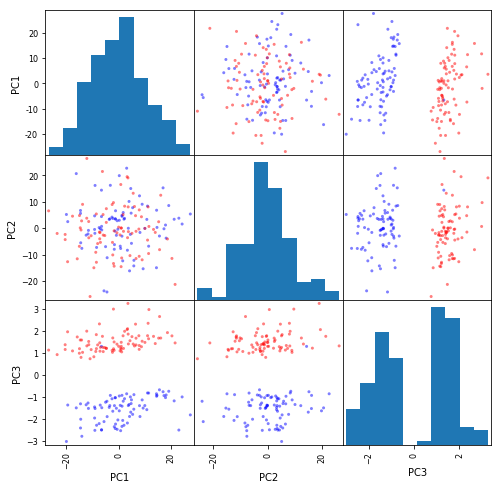

In [0]:
import pandas as pd
from pandas.tools import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, columns=['PC1', 'PC2', 'PC3']), figsize=(8, 8), color=colors) 
plt.show()

「ぜんぜん別物じゃあないかーッ！！ 元データの散布図行列も見せろーッ！！」

「すすすすみませーん」

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


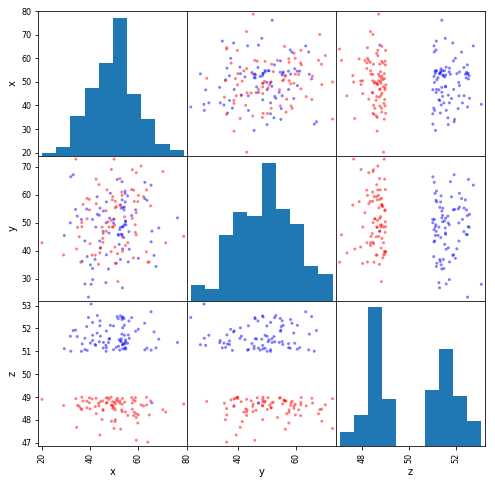

In [0]:
import pandas as pd
from pandas.tools import plotting 
plotting.scatter_matrix(pd.DataFrame(data,  columns=['x', 'y', 'z']), figsize=(8, 8), color=colors) 
plt.show()

# データの標準化

データは多角的に眺めなければいけませんね。その方法の一つがデータの標準化です。それをするだけでデータの見え方がだいぶ変わります。

In [0]:
import numpy as np
def zscore(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

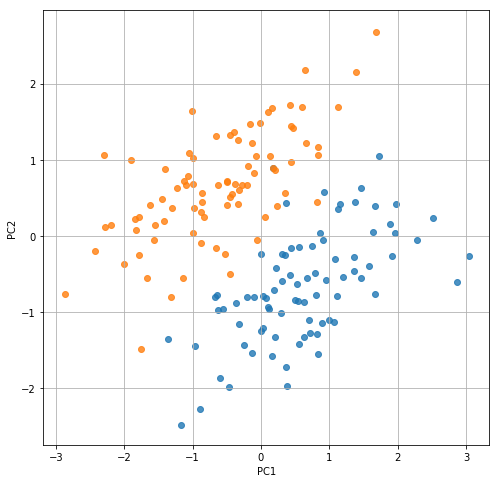

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #主成分分析器

#主成分分析の実行
pca = PCA()
pca.fit(zscore(data, axis=0))
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(zscore(data, axis=0))
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
plt.scatter(feature[:len(data1), 0], feature[:len(data1), 1], alpha=0.8)
plt.scatter(feature[len(data1):, 0], feature[len(data1):, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

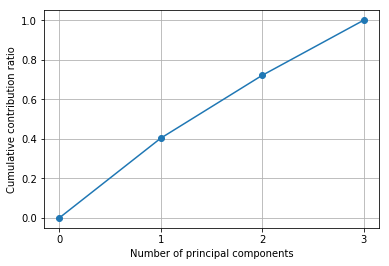

In [0]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
import numpy as np
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


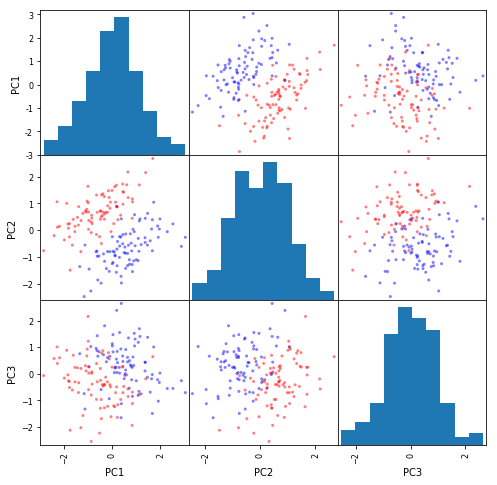

In [0]:
import pandas as pd
from pandas.tools import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, columns=['PC1', 'PC2', 'PC3']), figsize=(8, 8), color=colors) 
plt.show()

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


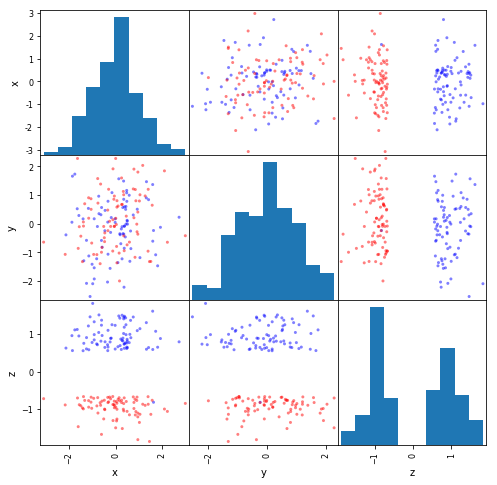

In [0]:
import pandas as pd
from pandas.tools import plotting 
plotting.scatter_matrix(pd.DataFrame(zscore(data, axis=0),  columns=['x', 'y', 'z']), figsize=(8, 8), color=colors) 
plt.show()